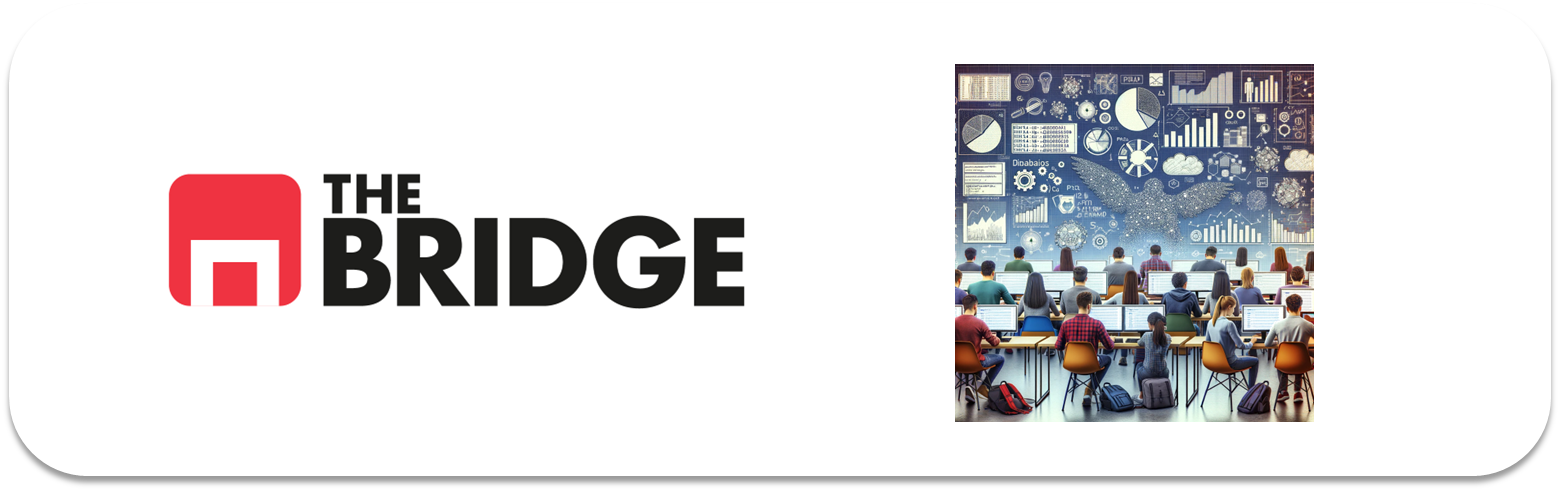

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [41]:
# Cargar bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

In [5]:
# cargar dataset

df_boston = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", delimiter='|')
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


CHAS y RAD podrían considerarse categóricas

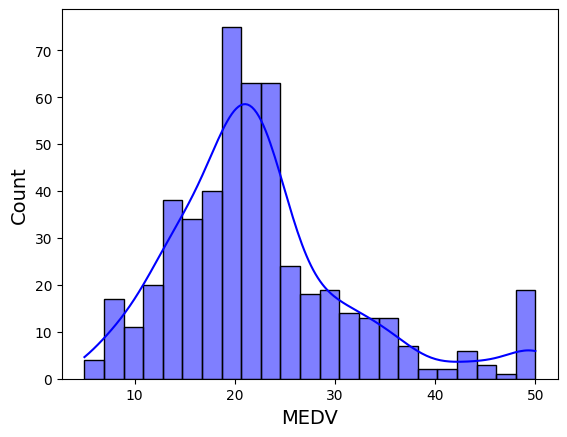

In [16]:
# analizar la variable target: la media del precio (MEDV)
target = "MEDV"

sns.histplot(df_boston['MEDV'], color='Blue', kde = True, alpha= 0.5)
plt.show()

Quitando la cola del final, tiene una distribución casi normal.

In [9]:
# Hacer el split entre train y test

# primero vemos las columnas
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [17]:
# Separamos los datos en features (x) y target (y)

train_set, test_set = train_test_split(df_boston, test_size=0.2, random_state=42)

In [19]:
#le quitamos el target a los features
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [23]:
# Mini EDA

# analizamos la correlacion de las numericas entre sí y la target

corr = train_set.corr(numeric_only = True)
corr[target].sort_values(ascending = False)

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

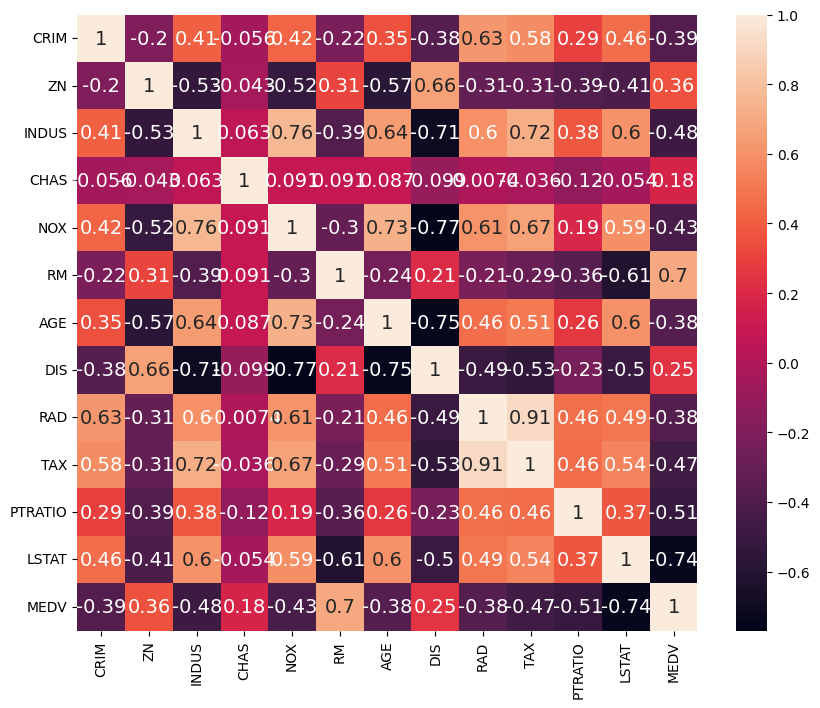

In [24]:
# Hacemos un mapa de calor

plt.figure(figsize=(10, 8))
sns.heatmap(df_boston.corr(numeric_only = True),annot=True);
plt.show();

Las mayores correlaciones con la target (MEDV) y, como consecuencia nuestras features son (por orden descendente): 
- RM: Número promedio de habitaciones por vivienda  
- ZN: Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados 
- DIS: Distancias ponderadas a cinco centros de empleo de Boston
- CHAS: Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario) 

In [25]:
features = ["RM", "ZN", "DIS", "CHAS"]
target = "MEDV"

Aunque CHAS podría considerarse categorica, ya tiene formato númerico, por lo que no tengo que transformar los features seleccionados.

Paso a preparar los features numericos

In [27]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
resultado_min_max = pd.DataFrame(min_max_scaler.fit_transform(train_set[features]), columns= features)
resultado_min_max

,RM,ZN,DIS,CHAS
0,-0.413870,-1.0,-0.823387,-1.0
1,-0.198292,-1.0,-0.387282,-1.0
2,-0.118161,-0.3,0.002301,-1.0
3,-0.088875,-1.0,-0.837736,-1.0
4,-0.241814,-1.0,-0.514972,-1.0
...,...,...,...,...
399,-0.197478,-1.0,-0.803326,-1.0
400,-0.189343,-0.6,-0.399940,-1.0
401,0.127517,0.6,0.312079,-1.0
402,0.125076,-1.0,-0.819022,-1.0


In [28]:
resultado_min_max.describe()

,RM,ZN,DIS,CHAS
count,404.000000,404.000000,404.000000,404.000000
mean,-0.002281,-0.768614,-0.512845,-0.856436
std,0.288571,0.463050,0.387605,0.516894
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.175310,-1.000000,-0.825719,-1.000000
50%,-0.045353,-1.000000,-0.627868,-1.000000
75%,0.128229,-0.600000,-0.223199,-1.000000
max,1.000000,1.000000,1.000000,1.000000


<Axes: >

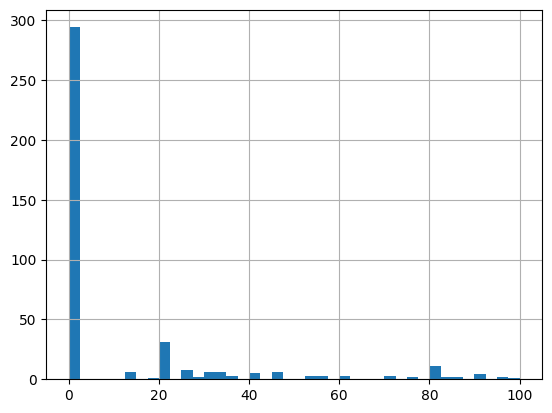

In [31]:
#Transformación de distribuciones

train_set["ZN"].hist(bins = 40)

Tiene efecto heavy tail y provoca que cuando escalemos los valores, se concentre en rangos muy pequeños.

In [32]:
resultado_min_max["ZN"].describe()

count    404.000000
mean      -0.768614
std        0.463050
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       -0.600000
max        1.000000
Name: ZN, dtype: float64

In [33]:
resultado_min_max.ZN.quantile(0.90)

-0.09999999999999998

Hemos concentrado el 90% de los valores entre -1 y -0.09, pero todavía quedan valores entre -0.09 y 1.

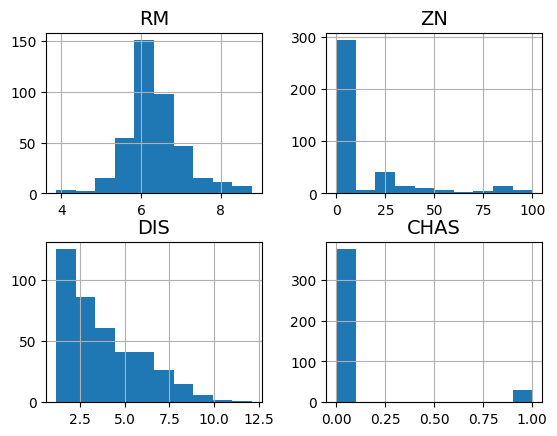

In [38]:
# como no he aplicado ninguna transformacion, las variables se verian asi: 
train_set[features].hist();

In [42]:
# crear regresion lineal
lm = LinearRegression()

In [43]:
# Entrenamos con los datos de train
lm.fit(X_train, y_train)

LinearRegression()